In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

In [2]:
datos = pd.read_csv('basketball.csv')

In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
height                 54 non-null float64
weight                 54 non-null int64
success_field_goals    54 non-null float64
success_free_throws    54 non-null float64
avg_points_scored      54 non-null float64
dtypes: float64(4), int64(1)
memory usage: 2.2 KB


In [4]:
#Mostrar las primeras 5 líneas de la data
datos.head()

,height,weight,success_field_goals,success_free_throws,avg_points_scored
0,6.8,225,0.442,0.672,9.2
1,6.3,180,0.435,0.797,11.7
2,6.4,190,0.456,0.761,15.8
3,6.2,180,0.416,0.651,8.6
4,6.9,205,0.449,0.900,23.2


In [5]:
datos = datos.rename(columns=
                     {'height':'Altura_pies','weight':'Peso_libras','succces_field_goals':'Porc_tiros_campos_exitosos','success_free_throws':'Porc_tiros_libres_exitoso',
                      'avg_points_scored':'Puntos_medio_anotado_juego'
    }
)

In [6]:
datos.head()

,Altura_pies,Peso_libras,success_field_goals,Porc_tiros_libres_exitoso,Puntos_medio_anotado_juego
0,6.8,225,0.442,0.672,9.2
1,6.3,180,0.435,0.797,11.7
2,6.4,190,0.456,0.761,15.8
3,6.2,180,0.416,0.651,8.6
4,6.9,205,0.449,0.900,23.2


In [7]:
#verificamos si hay nulls y eliminacion
eliminacionNulos = datos.isnull().sum()
eliminacionNulos

Altura_pies                   0
Peso_libras                   0
success_field_goals           0
Porc_tiros_libres_exitoso     0
Puntos_medio_anotado_juego    0
dtype: int64

In [8]:
#Probando las variables que tienen mas relacion
%matplotlib inline

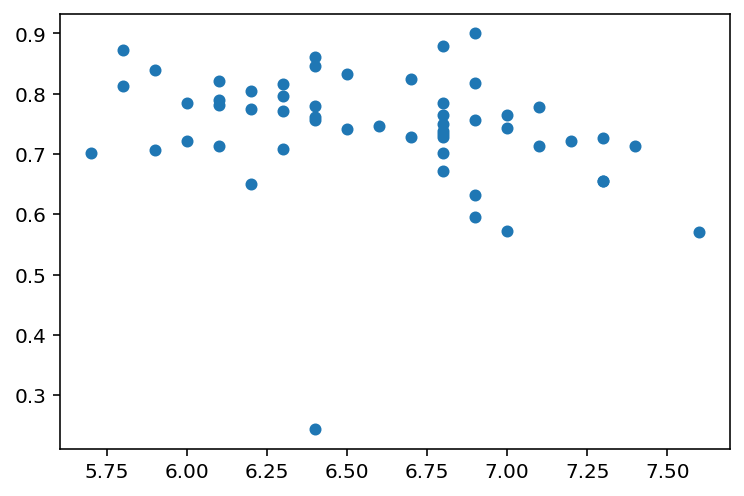

In [9]:
#relacionamos Altura_pies con Porc_tiros_libres_exitoso
plt.plot(datos.Altura_pies,datos.Porc_tiros_libres_exitoso,'o',markersize = 5)

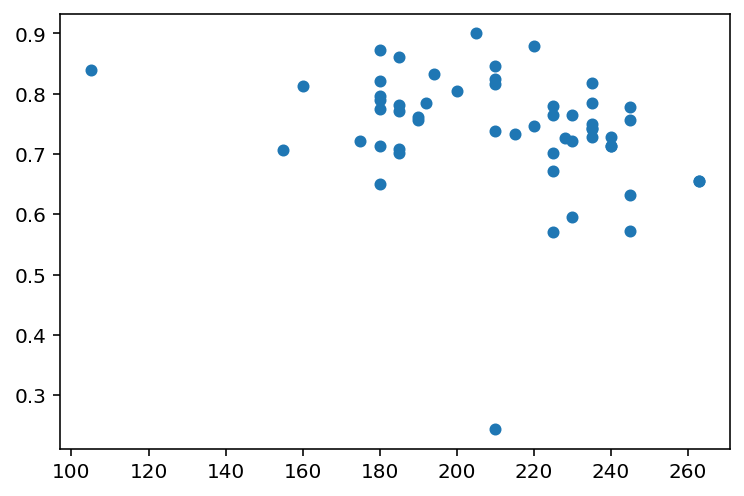

In [10]:
#relacionamos Peso_libras con Porc_tiros_libres_exitoso
plt.plot(datos.Peso_libras,datos.Porc_tiros_libres_exitoso,'o',markersize = 5)

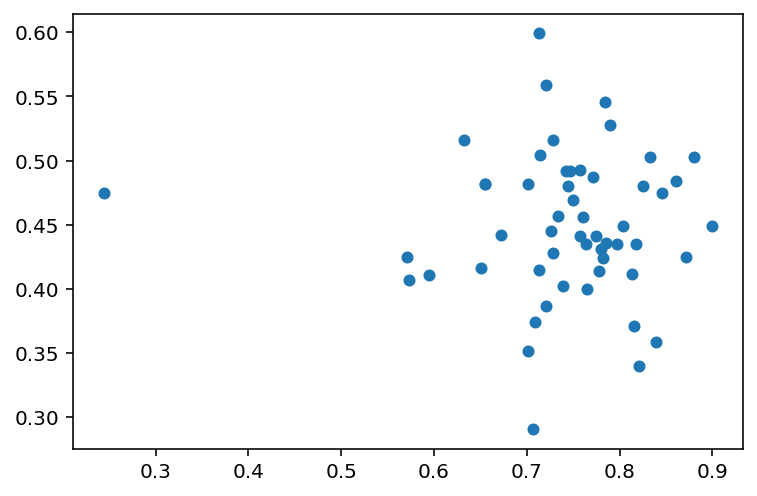

In [11]:
#relacionamos Porc_tiros_libres_exitoso con success_field_goals
plt.plot(datos.Porc_tiros_libres_exitoso,datos.success_field_goals,'o',markersize = 5)

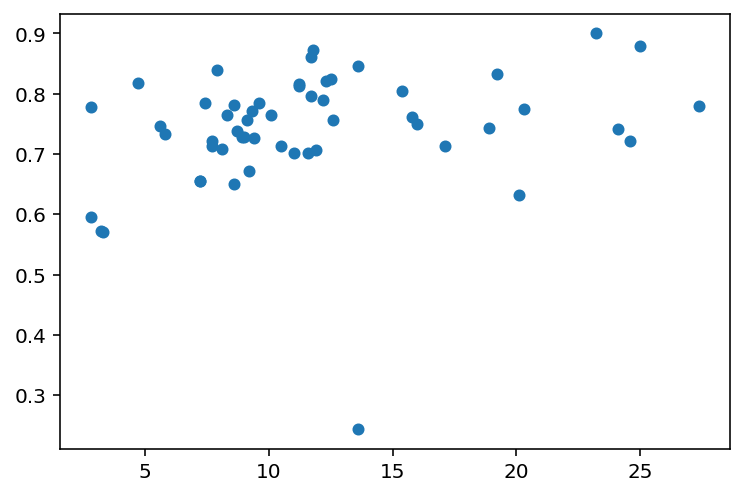

In [12]:
#relacionamos promedio de Puntos por Juego  con tiros de campo exitosos 
plt.plot(datos.Puntos_medio_anotado_juego,datos.Porc_tiros_libres_exitoso,'o',markersize = 5)

In [13]:
#EMPEZAMOS LA REGRESION
# variable objetivo
y = datos.success_field_goals
y.head()

0    0.442
1    0.435
2    0.456
3    0.416
4    0.449
Name: success_field_goals, dtype: float64

In [14]:
# retiramos la variable objetivo (dependiente) para quedarnos con las variables independientes
x = datos.drop(['success_field_goals'], axis=1)
x.head()

,Altura_pies,Peso_libras,Porc_tiros_libres_exitoso,Puntos_medio_anotado_juego
0,6.8,225,0.672,9.2
1,6.3,180,0.797,11.7
2,6.4,190,0.761,15.8
3,6.2,180,0.651,8.6
4,6.9,205,0.900,23.2


In [15]:
#mostramos las variables dependientes
del x['Porc_tiros_libres_exitoso']
x.head()

,Altura_pies,Peso_libras,Puntos_medio_anotado_juego
0,6.8,225,9.2
1,6.3,180,11.7
2,6.4,190,15.8
3,6.2,180,8.6
4,6.9,205,23.2


In [16]:
#REALIZAREMOS EL MODELO
# Separando el conjunto de datos en 2 grupos: entrenamiento (train) y prueba (test) con porcentajes de train = 80% y test = 20%
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.20)

In [17]:
# Definimos Modelo
from sklearn.linear_model import LinearRegression
model= LinearRegression(n_jobs=2)
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=2, normalize=False)

In [18]:
# Realizar la predicciòn sobre el conjunto de entrenamiento
prediciones = model.predict(x_train)
#predictions sobre el train
prediciones

array([0.41559442, 0.51331749, 0.52904561, 0.46593067, 0.43626541,
       0.46383857, 0.47770735, 0.45308625, 0.43561582, 0.45675496,
       0.4096022 , 0.42890169, 0.44146866, 0.45756758, 0.46186484,
       0.42959994, 0.44046929, 0.50417205, 0.50177488, 0.44808942,
       0.46202923, 0.41391916, 0.47063946, 0.50375125, 0.44051928,
       0.4095062 , 0.45187516, 0.45282719, 0.4553164 , 0.47921296,
       0.42472015, 0.47360603, 0.44906511, 0.44372116, 0.47988358,
       0.50655866, 0.41805468, 0.453294  , 0.49887543, 0.46542046,
       0.44895205, 0.40871591, 0.45886939])

In [19]:
#Returna el coeficiente de determinación R^2 de  la predicción. Se define como la proporción de la varianza total de la variable explicada por la regresión.
model.score(x_train,y_train)

0.33381499898319333

In [20]:
model.score(x_test,y_test)

0.33361805141529666

In [21]:
#ARBOL DE DECISIONES
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
import numpy as np

In [22]:
iris=load_iris()

In [23]:
x_train,x_test,y_train,y_test=train_test_split(iris.data,iris.target)

In [24]:
arbol=DecisionTreeClassifier(max_depth=3)

In [25]:
arbol.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [26]:
arbol.score(x_test,y_test)

0.9736842105263158

In [27]:
arbol.score(x_train,y_train)

0.9732142857142857

In [28]:
export_graphviz(arbol,out_file='arbol.dot', class_names=iris.target_names,
               feature_names=iris.feature_names, impurity= False, filled= True)

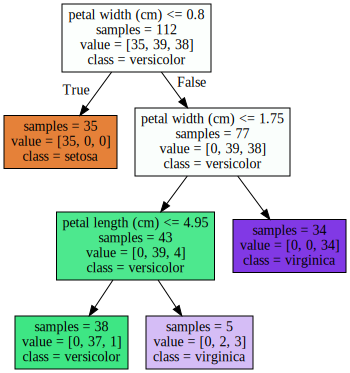

In [42]:
with open('arbol.dot') as f:
        dot_graph=f.read()
graphviz.Source(dot_graph)

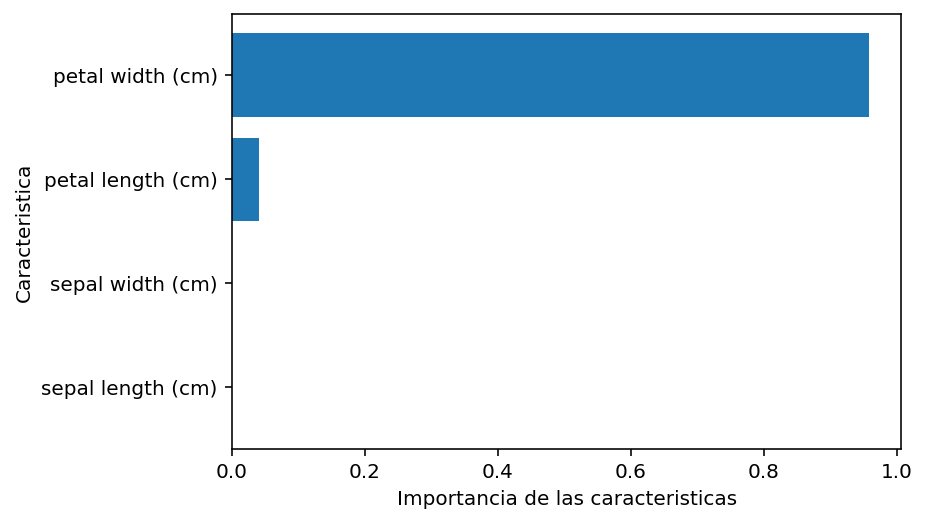

In [43]:
caracteristicas=iris.data.shape[1]
plt.barh(range(caracteristicas),arbol.feature_importances_)
plt.yticks(np.arange(caracteristicas),iris.feature_names)
plt.xlabel('Importancia de las caracteristicas')
plt.ylabel('Caracteristica')
plt.show()

In [31]:
arbol=DecisionTreeClassifier(max_depth=3)

In [32]:
arbol.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [33]:
arbol.score(x_test,y_test)

0.9736842105263158

In [34]:
arbol.score(x_train,y_train)

0.9732142857142857

In [35]:
export_graphviz(arbol,out_file='arbol.dot', class_names=iris.target_names,
               feature_names=iris.feature_names, impurity= False, filled= True)

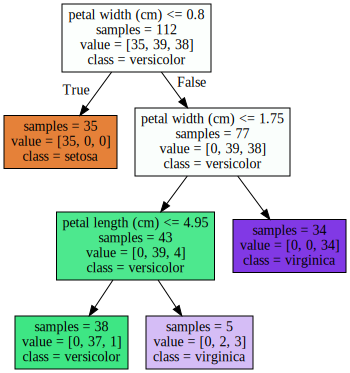

In [44]:
with open('arbol.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

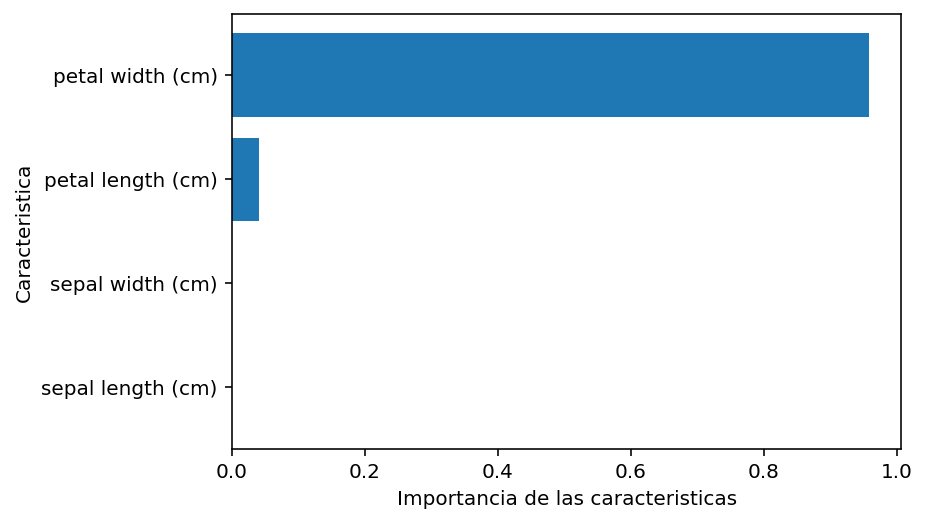

In [45]:
caracteristicas=iris.data.shape[1]
plt.barh(range(caracteristicas),arbol.feature_importances_)
plt.yticks(np.arange(caracteristicas),iris.feature_names)
plt.xlabel('Importancia de las caracteristicas')
plt.ylabel('Caracteristica')
plt.show()

In [38]:
arbol=DecisionTreeClassifier(max_depth=3)

In [46]:
arbol.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [40]:
arbol.score(x_train,y_train)

0.9732142857142857

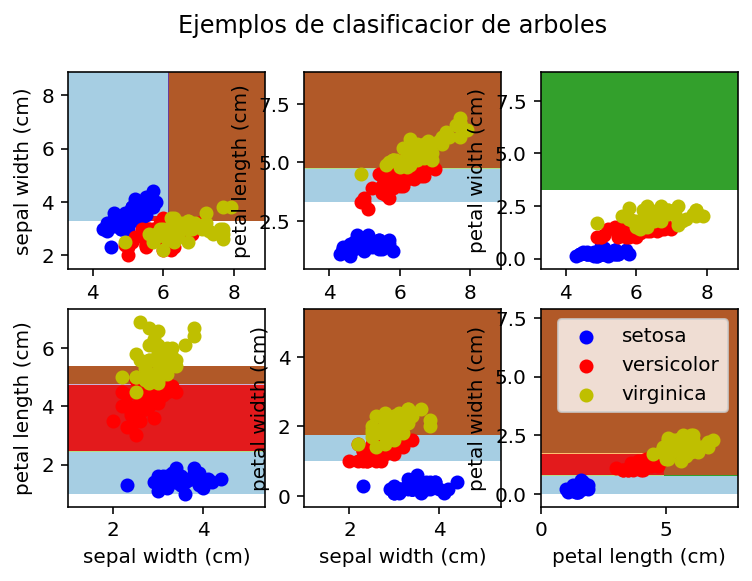

In [57]:
n_classes=3
plot_colors="bry"
plot_step=0.02

for pairidx, pair in enumerate([[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]):

    x=iris.data[:, pair]
    y=iris.target
    #Entrenar algoritmo
    clf= DecisionTreeClassifier(max_depth=3).fit(x,y)
    
    plt.subplot(2,3, pairidx + 1)
    x_min, x_max = x[:, 0].min() -1, x[:, 0].max()+1
    y_min, y_max = x[:, 0].min() -1, x[:, 0].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),np.arange(y_min, y_max, plot_step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z,cmap=plt.cm.Paired)
    
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")
    
    #sss
    for i, color in zip(range(n_classes),plot_colors):
        idx=np.where(y == i)
        plt.scatter(x[idx, 0], x[idx, 1] ,c=color, label=iris.target_names[i],cmap=plt.cm.Paired)
    plt.axis("tight")
    
plt.suptitle("Ejemplos de clasificacior de arboles")
plt.legend()
plt.show()
    
